DESIGN OPTIMISATION HOMEWORK3

NAME: YONESHWAR BABU
ASU ID:12204554365

PROBLEM 1

![](DOq1.png)

In [126]:
import numpy as np
import math as m
import torch as t
from torch.autograd import Variable
import matplotlib.pyplot as plt

A= Variable(t.tensor([1.0, 1.0]), requires_grad=True) #Setting initial A12 and A21 

T = 20

x1 = np.array([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

print('x1=',x1)

x2=1-x1 #x1+x2=1 given

print('x2=',x2)
 
a = 0.001 # assigning the step size

a_water=np.array([8.07131,1730.63,233.426])

a_14dioxane=np.array([7.43155,1554.679,240.337])

p=np.array([28.1,34.4,36.7,36.9,36.8,36.7,36.5,35.4,32.9,27.7,17.5])

def p_sat(a,T): #defining a function to find psat for water and 1,4 diaxone 
   return 10**(a[0]-((a[1])/(T+a[2]))) #

p_water=((p_sat(a_water,T)))

print("p water=", p_water)

p_14dioxane=((p_sat(a_14dioxane,T)))

print("p 14dioxane=",p_14dioxane)

for i in range(500): 
    for i in range(0,10):
        
        T1 = (x1[i]*p_water*t.exp(A[0]*((A[1]*x2[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))            
           
        T2 = (x2[i]*p_14dioxane*t.exp(A[1]*((A[0]*x1[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))            
            
        loss = (((T1)+(T2))-p[i])**2
              
        loss.backward()
              
    A.grad.numpy()
    
    with t.no_grad():
        
        A -=a* A.grad
        
        A.grad.zero_() 

sol=A.data.numpy()

print('The value of A12 is',sol[0],'& the value of A21 is',sol[1])
print('The final loss value =',loss.data.numpy())

x1= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x2= [1.  0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2 0.1 0. ]
p water= 17.47325208459706
p 14dioxane= 28.824099527405245
The value of A12 is 1.9584196 & the value of A21 is 1.6891851
The final loss value = 0.0008996979


Optimised P value                 = 28.1
Mathematical model P value        = 28.824099527405245
Difference between both P values  = -0.7240995274052437
Optimised P value                 = 34.4
Mathematical model P value        = 34.64431988732041
Difference between both P values  = -0.2443198873204082
Optimised P value                 = 36.7
Mathematical model P value        = 36.45297125714593
Difference between both P values  = 0.24702874285407006
Optimised P value                 = 36.9
Mathematical model P value        = 36.867317108431905
Difference between both P values  = 0.03268289156809345
Optimised P value                 = 36.8
Mathematical model P value        = 36.87400875317847
Difference between both P values  = -0.07400875317847522
Optimised P value                 = 36.7
Mathematical model P value        = 36.74983669539946
Difference between both P values  = -0.04983669539945623
Optimised P value                 = 36.5
Mathematical model P value        = 36.3904501927

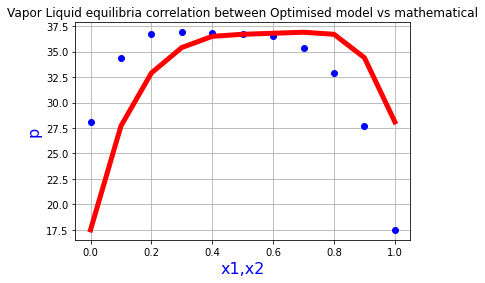

In [157]:
for i in range(0,10):
    
    M1 =(x1[i]*m.exp(A[0]*((A[1]*x2[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))*p_water
    
    M2 =(x2[i]*m.exp(A[1]*((A[0]*x1[i])/((A[0]*x1[i])+(A[1]*x2[i])))**2))*p_14dioxane
    
    compareP= M1+M2
      
    print("Optimised P value                 =",p[i])
    
    print("Mathematical model P value        =",compareP)
    
    print("Difference between both P values  =",(p[i]-compareP))

#print(compareP)

plt.plot(x1,p,'bo', linewidth='5')
plt.grid()
plt.plot(x2,p,c= 'r', linewidth='5')
plt.xlabel('x1,x2',c='b',fontsize='16')
plt.ylabel('p',c='b',fontsize='16')
plt.title('Vapor Liquid equilibria correlation between Optimised model vs mathematical' )
plt.plot(compareP_str,'b')





![](DOq2.png)


In [158]:
from bayes_opt import BayesianOptimization
from matplotlib import pyplot

def function(x, y):
    return -((4-2.1*x*2+(x**4)/3)*x2+x*y+(-4+4*y2)*y*2)
pbounds = {'x': (-3, 3), 'y': (-2, 2)}

optimizer = BayesianOptimization(f=function,pbounds=pbounds,random_state=1)

optimizer.maximize(init_points=2,n_iter=15)
print(optimizer.max)

|   iter    |  target   |     x     |     y     |
-------------------------------------------------


NameError: name 'x4' is not defined